In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# import datasets
data1 = pd.read_csv("business-licences-1997-to-2012.csv", delimiter = ";")
data2 = pd.read_csv("business-licences-2013-to-2024.csv", delimiter = ";")
data3 = pd.read_csv("business-licences.csv", delimiter = ";")
df = pd.concat([data1, data2, data3], ignore_index = True)
df.head()

/var/folders/zv/ljgjz5z10y93dzq0hqkt_5zh0000gn/T/ipykernel_31129/1842749288.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("business-licences-1997-to-2012.csv", delimiter = ";")
/var/folders/zv/ljgjz5z10y93dzq0hqkt_5zh0000gn/T/ipykernel_31129/1842749288.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("business-licences-2013-to-2024.csv", delimiter = ";")
/var/folders/zv/ljgjz5z10y93dzq0hqkt_5zh0000gn/T/ipykernel_31129/1842749288.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv("business-licences.csv", delimiter = ";")


,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom,geo_point_2d
0,98,173103,98-212536,0.0,Rubien Tang Benjamin Ng,NaN,Gone Out of Business,NaN,NaN,Duplex *Historic*,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2025-04-22T07:20:59-07:00,NaN,NaN
1,98,173119,98-212552,0.0,Terrise Mathers & Arthur Schmale,NaN,Pending,NaN,NaN,Duplex *Historic*,...,VANCOUVER,BC,CA,NaN,NaN,0.0,NaN,2025-04-22T07:20:59-07:00,NaN,NaN
2,98,173217,98-212650,0.0,Kam Fung Kwan,NaN,Issued,1998-02-25,1998-12-31,Duplex *Historic*,...,NaN,NaN,NaN,NaN,NaN,0.0,88.0,2025-04-22T07:20:59-07:00,NaN,NaN
3,98,173496,98-212929,0.0,Pierre Moreau,NaN,Pending,NaN,NaN,Duplex *Historic*,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2025-04-22T07:20:59-07:00,NaN,NaN
4,98,173617,98-213050,0.0,Patricia Salter,NaN,Pending,NaN,NaN,Duplex *Historic*,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2025-04-22T07:20:59-07:00,NaN,NaN


In [27]:
def convert_year(year):
    year = int(year)
    if year <= 99:      
        if year <= 25:  
            return 2000 + year
        else:
            return 1900 + year
    else:
        return year

df['FOLDERYEAR'] = df['FOLDERYEAR'].apply(convert_year)

In [28]:
# Comprehensive business type mapping (including historic types)
business_type_mapping = {
    # Technology & Digital
    'Information Communication Technology': 'Technology & Digital',
    'Digital Entertainment and Interactive Technology': 'Technology & Digital',
    'Computer Services *Historic*': 'Technology & Digital',
    'Telecommunications *Historic*': 'Technology & Digital',
    
    # Construction & Building
    'General Contractor': 'Construction & Building',
    'Trade Contractor': 'Construction & Building',
    'Contractor *Historic*': 'Construction & Building',
    'Contractor - Special Trades *Historic*': 'Construction & Building',
    'Electrical Contractor *Historic*': 'Construction & Building',
    'Gas Contractor *Historic*': 'Construction & Building',
    'Plumber *Historic*': 'Construction & Building',
    'Plumber & Gas Contractor *Historic*': 'Construction & Building',
    'Plumber Sprinkler & Gas Contractor *Historic*': 'Construction & Building',
    'Plumber & Sprinkler Contractor *Historic*': 'Construction & Building',
    'Sprinkler Contractor *Historic*': 'Construction & Building',
    'Sprinkler & Gas Contractor *Historic*': 'Construction & Building',
    'Roofer *Historic*': 'Construction & Building',
    'Painter *Historic*': 'Construction & Building',
    'Sheet Metal Works *Historic*': 'Construction & Building',
    'Building Repair and Maintenance': 'Construction & Building',
    'General Repair and Maintenance': 'Construction & Building',
    'Repair/ Service/Maintenance *Historic*': 'Construction & Building',
    'Architectural and Engineering Services': 'Construction & Building',
    'Chimney Sweep *Historic*': 'Construction & Building',
    'Locksmith *Historic*': 'Construction & Building',
    
    # Financial Services
    'Financial Services': 'Financial Services',
    'Financial Services *Historic*': 'Financial Services',
    'Money Services': 'Financial Services',
    'Money Services *Historic*': 'Financial Services',
    'Brokerage Services': 'Financial Services',
    'Insurance Services': 'Financial Services',
    'Financial Institution': 'Financial Services',
    'Financial Institution *Historic*': 'Financial Services',
    'Cheque Cashing *Historic*': 'Financial Services',
    'Pawnbroker *Historic*': 'Financial Services',
    
    # Logistics & Transportation
    'Logistics Services': 'Logistics & Transportation',
    'Transportation and Support Services': 'Logistics & Transportation',
    'Moving/Transfer Service *Historic*': 'Logistics & Transportation',
    'Warehouse Operator - Non-Food': 'Logistics & Transportation',
    'Warehouse Operator - Food': 'Logistics & Transportation',
    'Waste Collection and Hauling Services': 'Logistics & Transportation',
    'Recycling and Resource Recovery Services': 'Logistics & Transportation',
    'Recycling Depot *Historic*': 'Logistics & Transportation',
    'Scavenging *Historic*': 'Logistics & Transportation',
    'Dairy Delivery Services *Historic*': 'Logistics & Transportation',
    'Liquor Delivery Services *Historic*': 'Logistics & Transportation',
    
    # Personal & Beauty Services
    'Personal Services': 'Personal & Beauty Services',
    'Personal Services *Historic*': 'Personal & Beauty Services',
    'Beauty Services': 'Personal & Beauty Services',
    'Beauty Services *Historic*': 'Personal & Beauty Services',
    'Health and Beauty *Historic*': 'Personal & Beauty Services',
    'Hairdressing Salon *Historic*': 'Personal & Beauty Services',
    'Hairdresser *Historic*': 'Personal & Beauty Services',
    'Esthetician *Historic*': 'Personal & Beauty Services',
    'Cosmetologist *Historic*': 'Personal & Beauty Services',
    'Electrolysis  *Historic*': 'Personal & Beauty Services',
    'Special Beauty Culturist *Historic*': 'Personal & Beauty Services',
    'Tanning Salon *Historic*': 'Personal & Beauty Services',
    'Nail Technician *Historic*': 'Personal & Beauty Services',
    'Tattoo Parlour *Historic*': 'Personal & Beauty Services',
    'Laundry Services': 'Personal & Beauty Services',
    'Laundry (w/equipment) *Historic*': 'Personal & Beauty Services',
    'Laundry-Coin Operated Services *Historic*': 'Personal & Beauty Services',
    'Laundry Depot *Historic*': 'Personal & Beauty Services',
    'Dry Cleaner *Historic*': 'Personal & Beauty Services',
    'Seamstress/Tailor *Historic*': 'Personal & Beauty Services',
    'Boot & Shoe Repairs *Historic*': 'Personal & Beauty Services',
    
    # Real Estate & Property
    'Long-term Rental': 'Real Estate & Property',
    'Short-term Rental Operator': 'Real Estate & Property',
    'Real Estate Services': 'Real Estate & Property',
    'Real Estate Dealer *Historic*': 'Real Estate & Property',
    'Property Management *Historic*': 'Real Estate & Property',
    'Parking Area / Garage': 'Real Estate & Property',
    'Auto Parking Lot/Parkade *Historic*': 'Real Estate & Property',
    'Backyard Pay Parking *Historic*': 'Real Estate & Property',
    'Duplex *Historic*': 'Real Estate & Property',
    'Multiple Dwelling *Historic*': 'Real Estate & Property',
    'Apartment House *Historic*': 'Real Estate & Property',
    'Apartment House Strata *Historic*': 'Real Estate & Property',
    'Apartment House-99 Year Lease *Historic*': 'Real Estate & Property',
    'Single Detached House *Historic*': 'Real Estate & Property',
    'Secondary Suite - Permanent *Historic*': 'Real Estate & Property',
    'Secondary Suite - Phase Out *Historic*': 'Real Estate & Property',
    'Residential/Commercial *Historic*': 'Real Estate & Property',
    'Pre-1956 Dwelling *Historic*': 'Real Estate & Property',
    'Rooming House *Historic*': 'Real Estate & Property',
    'Non-profit Housing *Historic*': 'Real Estate & Property',
    'Trailer Court *Historic*': 'Real Estate & Property',
    'Personal Care Home *Historic*': 'Real Estate & Property',
    
    # Business & Professional Services
    'Business Support Services': 'Business & Professional Services',
    'Business Services *Historic*': 'Business & Professional Services',
    'Consulting and Management Services': 'Business & Professional Services',
    'Legal Services': 'Business & Professional Services',
    'Design Services': 'Business & Professional Services',
    'Security Services': 'Business & Professional Services',
    'Security Services *Historic*': 'Business & Professional Services',
    'Electrical-Security Alarm Installation *Historic*': 'Business & Professional Services',
    'Rental Services': 'Business & Professional Services',
    'Rentals *Historic*': 'Business & Professional Services',
    'Janitorial Services *Historic*': 'Business & Professional Services',
    'Window Cleaner *Historic*': 'Business & Professional Services',
    'Carpet/Upholstery Cleaner *Historic*': 'Business & Professional Services',
    'Power/ Pressure Washing *Historic*': 'Business & Professional Services',
    'Office *Historic*': 'Business & Professional Services',
    'Employment Agency *Historic*': 'Business & Professional Services',
    'Referral Services *Historic*': 'Business & Professional Services',
    'Travel Agent *Historic*': 'Business & Professional Services',
    'Dating Services *Historic*': 'Business & Professional Services',
    'Postal Rental Agency *Historic*': 'Business & Professional Services',
    'Equipment Operator *Historic*': 'Business & Professional Services',
    'Specialized Services *Historic*': 'Business & Professional Services',
    
    # Education & Training
    'Arts and Creative Instruction': 'Education & Training',
    'Business - Vocational Instruction': 'Education & Training',
    'Sport and Fitness Instruction': 'Education & Training',
    'Private School or College': 'Education & Training',
    'Instruction *Historic*': 'Education & Training',
    'School (Business & Trade) *Historic*': 'Education & Training',
    'ESL Instruction *Historic*': 'Education & Training',
    'Educational *Historic*': 'Education & Training',
    
    # Arts, Media & Entertainment
    'Artist': 'Arts, Media & Entertainment',
    'Artist *Historic*': 'Arts, Media & Entertainment',
    'Artist Studio': 'Arts, Media & Entertainment',
    'Artist Live/Work Studio *Historic*': 'Arts, Media & Entertainment',
    'Artist Agency': 'Arts, Media & Entertainment',
    'Photography Production and Rehearsal Studio': 'Arts, Media & Entertainment',
    'Publishing and Journalism Services': 'Arts, Media & Entertainment',
    'Entertainment Facility': 'Arts, Media & Entertainment',
    'Entertainment Services *Historic*': 'Arts, Media & Entertainment',
    'Entertainment Centre *Historic*': 'Arts, Media & Entertainment',
    'Theatre': 'Arts, Media & Entertainment',
    'Theatre *Historic*': 'Arts, Media & Entertainment',
    'Venue': 'Arts, Media & Entertainment',
    'Venue *Historic*': 'Arts, Media & Entertainment',
    'Creative Products Manufacturer': 'Arts, Media & Entertainment',
    'Studio *Historic*': 'Arts, Media & Entertainment',
    'Production Company *Historic*': 'Arts, Media & Entertainment',
    'Temporary Filming Company': 'Arts, Media & Entertainment',
    'Photographer *Historic*': 'Arts, Media & Entertainment',
    'Photo Services *Historic*': 'Arts, Media & Entertainment',
    'Talent Agency *Historic*': 'Arts, Media & Entertainment',
    'Model Agency *Historic*': 'Arts, Media & Entertainment',
    'Booking Agency *Historic*': 'Arts, Media & Entertainment',
    
    # Marketing & Events
    'Marketing Public Relations Advertising and Event Promotion Services': 'Marketing & Events',
    'Special Events': 'Marketing & Events',
    'Printing Imaging and Photo Services': 'Marketing & Events',
    'Printing Services *Historic*': 'Marketing & Events',
    'Blueprint Printing *Historic*': 'Marketing & Events',
    'Sign Permit *Historic*': 'Marketing & Events',
    'Exhibitions/Shows/Concerts *Historic*': 'Marketing & Events',
    'Late Night Dance Event *Historic*': 'Marketing & Events',
    
    # Events & Entertainment Venues
    'Exhibition Centre': 'Events & Entertainment Venues',
    'Hall / Spectator Sports Venue': 'Events & Entertainment Venues',
    'Assembly Hall *Historic*': 'Events & Entertainment Venues',
    'Stadium/Concert Hall  *Historic*': 'Events & Entertainment Venues',
    'Amusement Park': 'Events & Entertainment Venues',
    'Bingo Hall / Casino / Horse Racing': 'Events & Entertainment Venues',
    'Bingo Hall *Historic*': 'Events & Entertainment Venues',
    'Casino *Historic*': 'Events & Entertainment Venues',
    'Horse Racing *Historic*': 'Events & Entertainment Venues',
    'Dance Hall *Historic*': 'Events & Entertainment Venues',
    'Arcade *Historic*': 'Events & Entertainment Venues',
    'Bowling Alley *Historic*': 'Events & Entertainment Venues',
    'Family Sports & Entertain Ctr *Historic*': 'Events & Entertainment Venues',
    'Billiard Room Keeper *Historic*': 'Events & Entertainment Venues',
    
    # Healthcare
    'Health Care Professionals and Services': 'Healthcare',
    'Health Services *Historic*': 'Healthcare',
    'Health Care Facility': 'Healthcare',
    'Health Enhancement Services': 'Healthcare',
    'Pharmacy': 'Healthcare',
    'Laboratory Services': 'Healthcare',
    'Acupuncturist *Historic*': 'Healthcare',
    'Massage Therapist *Historic*': 'Healthcare',
    'Physical Therapist *Historic*': 'Healthcare',
    'Therapeutic Touch Technique *Historic*': 'Healthcare',
    'Private Hospital *Historic*': 'Healthcare',
    'Herbalist *Historic*': 'Healthcare',
    'Psychic/Fortune Teller *Historic*': 'Healthcare',
    'Veterinarian *Historic*': 'Healthcare',
    'Animal Clinic/Hospital *Historic*': 'Healthcare',
    
    # Fitness & Wellness
    'Fitness Centre': 'Fitness & Wellness',
    'Steam Bath *Historic*': 'Fitness & Wellness',
    
    # Retail - General
    'Retail Dealer': 'Retail - General',
    'Retail Dealer *Historic*': 'Retail - General',
    'Retail Dealer - Used Goods': 'Retail - General',
    'Retail with Anc. Secondhand *Historic*': 'Retail - General',
    'Secondhand Dealer *Historic*': 'Retail - General',
    'Junk Dealer *Historic*': 'Retail - General',
    'Street Vendor': 'Retail - General',
    'Peddler *Historic*': 'Retail - General',
    'Peddler - Food *Historic*': 'Retail - General',
    'Transient Trader/Peddler-A *Historic*': 'Retail - General',
    'Transient Trader/Peddler-W *Historic*': 'Retail - General',
    'Vending Machines *Historic*': 'Retail - General',
    'Pet Store *Historic*': 'Retail - General',
    'Jeweller *Historic*': 'Retail - General',
    'Machinery Dealer *Historic*': 'Retail - General',
    
    # Retail - Specialized
    'Retail Dealer - Cannabis': 'Retail - Specialized',
    'Cannabis Licence Application': 'Retail - Specialized',
    'Adult Retail Store': 'Retail - Specialized',
    'Adult Retail Store *Historic*': 'Retail - Specialized',
    'Adult Entertainment Store *Historic*': 'Retail - Specialized',
    
    # Food Retail
    'Retail Dealer - Food': 'Food Retail',
    'Retail Dealer - Food *Historic*': 'Food Retail',
    'Grocery Store': 'Food Retail',
    'Retail Dealer - Grocery *Historic*': 'Food Retail',
    'Food Market': 'Food Retail',
    'Retail Dealer - Market Outlet *Historic*': 'Food Retail',
    'Public Market Operator-Annual *Historic*': 'Food Retail',
    'Public Market - Daily *Historic*': 'Food Retail',
    'Liquor Retail Store': 'Food Retail',
    'Liquor Retail Store *Historic*': 'Food Retail',
    'Specialty Wine Store *Historic*': 'Food Retail',
    'U-Brew/U-Vin *Historic*': 'Food Retail',
    'Christmas Tree Lot *Historic*': 'Food Retail',
    
    # Food Service & Hospitality
    'Restaurant': 'Food Service',
    'Restaurant Class 1 *Historic*': 'Food Service',
    'Restaurant Class 2 *Historic*': 'Food Service',
    'Restaurant Class 1 & Karaoke *Historic*': 'Food Service',
    'Limited Service Food Establishment': 'Food Service',
    'Ltd Service Food Establishment *Historic*': 'Food Service',
    'Caterer': 'Food Service',
    'CNIB Concession - Food *Historic*': 'Food Service',
    'Liquor Establishment': 'Food Service',
    'Liquor Establishment Standard *Historic*': 'Food Service',
    'Liquor Establishment Extended  *Historic*': 'Food Service',
    'Liquor License Application': 'Food Service',
    'Temp Liquor Licence Amendment': 'Food Service',
    'Provincial Liquor Review *Historic*': 'Food Service',
    'Dining Lounge *Historic*': 'Food Service',
    'Dining Lounge/Room *Historic*': 'Food Service',
    "Lounge 'A' *Historic*": 'Food Service',
    'Club Lounge *Historic*': 'Food Service',
    'Hotel Lounge *Historic*': 'Food Service',
    'Neighbourhood Pub *Historic*': 'Food Service',
    'Public House *Historic*': 'Food Service',
    'Marine Pub *Historic*': 'Food Service',
    'Cabaret *Historic*': 'Food Service',
    'Club *Historic*': 'Food Service',
    'Club Manager *Historic*': 'Food Service',
    
    # Accommodation
    'Hotel or Motel': 'Accommodation',
    'Motel *Historic*': 'Accommodation',
    'Bed and Breakfast': 'Accommodation',
    'Live-aboards *Historic*': 'Accommodation',
    
    # Manufacturing & Processing
    'Non-Food Manufacturer Assembler and Processor': 'Manufacturing & Processing',
    'Food Manufacturer Assembler and Processor': 'Manufacturing & Processing',
    'Manufacturer *Historic*': 'Manufacturing & Processing',
    'Manufacturer - Food *Historic*': 'Manufacturing & Processing',
    'Manufacturer with Anc. Retail *Historic*': 'Manufacturing & Processing',
    'Manufacturer - Food with Anc. Retail *Historic*': 'Manufacturing & Processing',
    'Food Processing *Historic*': 'Manufacturing & Processing',
    'Product Assembly *Historic*': 'Manufacturing & Processing',
    'Homecraft *Historic*': 'Manufacturing & Processing',
    
    # Wholesale
    'Wholesale Dealer - Non-Food': 'Wholesale',
    'Wholesale Dealer - Food': 'Wholesale',
    'Wholesale  Dealer *Historic*': 'Wholesale',
    'Wholesale Dealer - Food *Historic*': 'Wholesale',
    'Wholesale Dealer w/ Anc. Retail *Historic*': 'Wholesale',
    'Wholesale Dealer - Food with Anc. Retail *Historic*': 'Wholesale',
    'Auto Wholesaler *Historic*': 'Wholesale',
    'Lumber Yard *Historic*': 'Wholesale',
    
    # Automotive & Fuel
    'Gas Station': 'Automotive & Fuel',
    'Gasoline Station *Historic*': 'Automotive & Fuel',
    'Self-serve Station *Historic*': 'Automotive & Fuel',
    'Conventional Gas Station *Historic*': 'Automotive & Fuel',
    'Split-island Station *Historic*': 'Automotive & Fuel',
    'Gas Station - Marine *Historic*': 'Automotive & Fuel',
    'Gas Station - Propane *Historic*': 'Automotive & Fuel',
    'Card Lock Station *Historic*': 'Automotive & Fuel',
    'Marine Service Station': 'Automotive & Fuel',
    'Oil Gas and Other Fuels': 'Automotive & Fuel',
    'Vehicle Repair Detailing and Washing Services': 'Automotive & Fuel',
    'Auto Repairs *Historic*': 'Automotive & Fuel',
    'Auto Detailing *Historic*': 'Automotive & Fuel',
    'Auto Washer *Historic*': 'Automotive & Fuel',
    'Auto Painter & Body Shop *Historic*': 'Automotive & Fuel',
    'Auto Dealer *Historic*': 'Automotive & Fuel',
    'Auto Wrecker *Historic*': 'Automotive & Fuel',
    
    # Mining & Natural Resources
    'Mining Services': 'Mining & Natural Resources',
    'Forestry Services': 'Mining & Natural Resources',
    
    # Tourism & Recreation
    'Tourism Services': 'Tourism & Recreation',
    'Marina Operator': 'Tourism & Recreation',
    'Marina Operator *Historic*': 'Tourism & Recreation',
    'Marine Services *Historic*': 'Tourism & Recreation',
    'Boat Charter Services *Historic*': 'Tourism & Recreation',
    'Livery & Feed Stables *Historic*': 'Tourism & Recreation',
    
    # Community & Non-Profit
    'Association or Society': 'Community & Non-Profit',
    'Community Association *Historic*': 'Community & Non-Profit',
    'Community Association Manager *Historic*': 'Community & Non-Profit',
    'Soliciting For Charity': 'Community & Non-Profit',
    
    # Animal Services
    'Animal Services': 'Animal Services',
    'Animal Services *Historic*': 'Animal Services',
    
    # Agriculture & Urban Farming
    'Urban Farm Class A': 'Agriculture & Urban Farming',
    'Urban Farm Class B': 'Agriculture & Urban Farming',
    'Agriculture *Historic*': 'Agriculture & Urban Farming',
    
    # Adult Entertainment
    'Adult Services': 'Adult Entertainment',
    'Body Rub Parlour *Historic*': 'Adult Entertainment',
    'Exotic Dancers *Historic*': 'Adult Entertainment',
    'Social Escort Services *Historic*': 'Adult Entertainment',
    
    # Special/Other
    '2010 Winter Games *Historic*': 'Special Events & Games',
    'Auctioneer *Historic*': 'Auction & Estate Services',
    'Bottle Depot *Historic*': 'Recycling & Bottle Depots',
    'Funeral Services *Historic*': 'Funeral & Memorial Services',
    'Landscape Gardener *Historic*': 'Landscaping Services',
    'Pest Control/Exterminator *Historic*': 'Pest Control Services',
    'Piano Tuner *Historic*': 'Specialty Services',
}

# Apply the mapping
df['business_category'] = df['BusinessType'].map(business_type_mapping)

# Check for unmapped values
unmapped = df[df['business_category'].isna()]['BusinessType'].unique()
if len(unmapped) > 0:
    print(f"Found {len(unmapped)} unmapped business types:")
    for bt in unmapped:
        print(f"  - {bt}")
    print("\nAssigning unmapped types to 'Other'")
    data['business_category'] = data['business_category'].fillna('Other')

# Now group and plot
grouped = df.groupby(['FOLDERYEAR', 'business_category']).size().unstack(fill_value=0)

In [29]:
# Map BusinessType to 10 top-level categories
top_level_mapping = {
    # 1. Technology & Digital
    'Technology & Digital': 'Technology & Digital',
    
    # 2. Construction & Building
    'Construction & Building': 'Construction & Building',
    
    # 3. Financial Services
    'Financial Services': 'Financial Services',
    
    # 4. Logistics & Transportation
    'Logistics & Transportation': 'Logistics & Transportation',
    
    # 5. Personal & Beauty Services
    'Personal & Beauty Services': 'Personal & Beauty Services',
    
    # 6. Real Estate & Property
    'Real Estate & Property': 'Real Estate & Property',
    
    # 7. Business & Professional Services
    'Business & Professional Services': 'Business & Professional Services',
    
    # 8. Education, Arts & Entertainment
    'Education & Training': 'Education, Arts & Entertainment', 
    'Arts, Media & Entertainment': 'Education, Arts & Entertainment',
    'Marketing & Events': 'Education, Arts & Entertainment',
    'Events & Entertainment Venues': 'Education, Arts & Entertainment',
    
    # 9. Healthcare & Wellness
    'Healthcare': 'Healthcare & Wellness',
    'Fitness & Wellness': 'Healthcare & Wellness',
    
    # 10. Food, Retail & Accommodation
    'Food Retail': 'Food, Retail & Accommodation',
    'Food Service': 'Food, Retail & Accommodation',
    'Accommodation': 'Food, Retail & Accommodation',
    'Retail - General': 'Food, Retail & Accommodation',
    'Retail - Specialized': 'Food, Retail & Accommodation',
    
    # 11. Manufacturing & Industrial (optional if needed)
    'Manufacturing & Processing': 'Manufacturing & Industrial',
    'Wholesale': 'Manufacturing & Industrial',
    'Automotive & Fuel': 'Manufacturing & Industrial',
    'Mining & Natural Resources': 'Manufacturing & Industrial',
    
    # # 12. Recreation & Games
    # 'Tourism & Recreation': 'Tourism & Recreation',
    # 'Special Events & Games': 'Special Events & Games',

    # # 13. Environmental Services
    # 'Animal Services': 'Animal Services',
    # 'Agriculture & Urban Farming': 'Agriculture & Urban Farming',
    # 'Recycling & Bottle Depots': 'Environmental Services',
    # 'Pest Control Services': 'Pest Control Services',

    # # 14. Community Services
    # 'Community & Non-Profit': 'Community & Non-Profit',
    # 'Funeral & Memorial Services': 'Funeral & Memorial Services',
    # 'Specialty Services': 'Other / Misc'

    #12. Other / Misc
    'Tourism & Recreation': 'Other / Misc',
    'Special Events & Games': 'Other / Misc',
    'Community & Non-Profit': 'Other / Misc',
    'Animal Services': 'Other / Misc',
    'Agriculture & Urban Farming': 'Other / Misc',
    'Adult Entertainment': 'Other / Misc',
    'Special Events & Games': 'Other / Misc',
    'Auction & Estate Services': 'Other / Misc',
    'Recycling & Bottle Depots': 'Other / Misc',
    'Funeral & Memorial Services': 'Other / Misc',
    'Landscaping Services': 'Other / Misc',
    'Pest Control Services': 'Other / Misc',
    'Specialty Services': 'Other / Misc',
}

# First map the detailed BusinessType to its intermediate category
df['BusinessCategory'] = df['BusinessType'].map(business_type_mapping)

# Then map intermediate category to top-level category
df['TopLevelCategory'] = df['BusinessCategory'].map(top_level_mapping)

# Fill any missing categories
df['TopLevelCategory'].fillna('Other / Misc', inplace=True)

df['TopLevelCategory'].value_counts()

/var/folders/zv/ljgjz5z10y93dzq0hqkt_5zh0000gn/T/ipykernel_31129/2917081083.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TopLevelCategory'].fillna('Other / Misc', inplace=True)


TopLevelCategory
Real Estate & Property              470333
Business & Professional Services    341232
Food, Retail & Accommodation        321290
Construction & Building             237467
Healthcare & Wellness               116193
Manufacturing & Industrial          104010
Education, Arts & Entertainment      78426
Personal & Beauty Services           68047
Financial Services                   49073
Other / Misc                         42122
Technology & Digital                 32205
Logistics & Transportation           12903
Name: count, dtype: int64

**MOST IMPACTED AND FASTEST RECOVERY DURING COVID-19**

In [30]:
def covid_phase(year):
    if year in [2017, 2018, 2019]:
        return "Pre-COVID"
    elif year in [2020, 2021]:
        return "COVID"
    elif year >= 2022:
        return "Post-Recovery"

# Apply phase
df['COVID_Phase'] = df['FOLDERYEAR'].apply(covid_phase)

In [31]:
df['BusinessID'] = df['BusinessTradeName'].fillna('').str.strip()

# if tradename is blank or NA, use BusinessName
mask_empty = df['BusinessID'] == ''
df.loc[mask_empty, 'BusinessID'] = df.loc[mask_empty, 'BusinessName'].str.strip()

# normalize text
df['BusinessID'] = df['BusinessID'].str.lower()

active_statuses = ['Issued']
df['IsActive'] = df['Status'].isin(active_statuses).astype(int)


active_unique = (
    df[df['IsActive'] == 1]
      .drop_duplicates(subset=['BusinessID', 'FOLDERYEAR'])
)

active_business = (
    active_unique
      .groupby(['FOLDERYEAR', 'TopLevelCategory'])
      .size()
      .reset_index(name='ActiveBusiness')
)

In [32]:
agg_phase = (
    df.groupby(['COVID_Phase', 'TopLevelCategory'])['IsActive']
    .sum()
    .reset_index(name='ActiveCount')
)

In [33]:
pivot_phase = agg_phase.pivot(index='TopLevelCategory', columns='COVID_Phase', values='ActiveCount').fillna(0)
avg_precovid = (pivot_phase['Pre-COVID'])/3
avg_covid = (pivot_phase['COVID'])/2
avg_postcovid = (pivot_phase['Post-Recovery'])/4
pivot_phase['Impact (%)'] = ((avg_covid - avg_precovid) / avg_precovid) * 100
pivot_phase['Recovery (%)'] = ((avg_postcovid - avg_covid) / avg_covid) * 100

# Sort to find top 10
most_impacted = pivot_phase.sort_values('Impact (%)')
fastest_recovery = pivot_phase.sort_values('Recovery (%)', ascending=False)

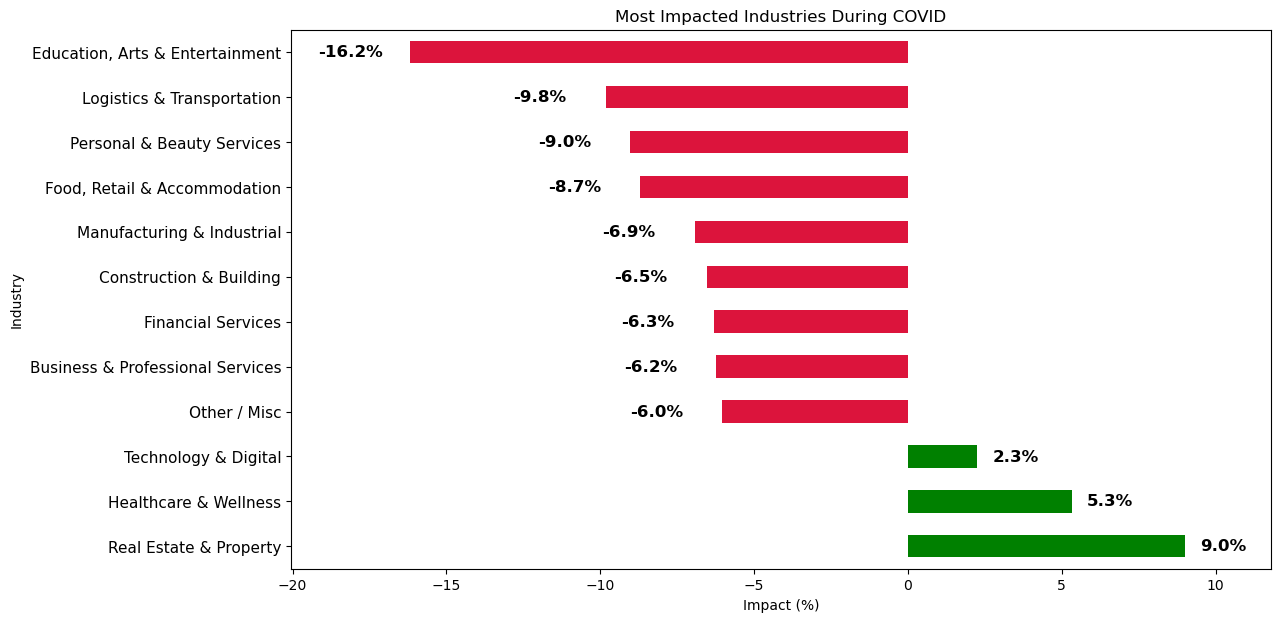

In [34]:
# --- MOST IMPACTED ---
plt.figure(figsize=(14,7))

colors_impact = ['green' if v > 0 else 'crimson' for v in most_impacted['Impact (%)']]

ax = most_impacted['Impact (%)'].plot(
    kind='barh',
    color=colors_impact
)
ax.set_yticklabels(most_impacted.index, fontsize=11)
x_min, x_max = ax.get_xlim()

plt.title('Most Impacted Industries During COVID')
plt.xlabel('Impact (%)')
plt.ylabel('Industry')
plt.gca().invert_yaxis()
plt.subplots_adjust(left=0.2)
for i, v in enumerate(most_impacted['Impact (%)']):
    if v < 0:
        ax.text(v - 3,   
                i,
                f"{v:.1f}%",
                va='center',
                ha='left',
                fontsize=12,
                fontweight='bold')
    else:
        ax.text(v + 2,
                i,
                f"{v:.1f}%",
                va='center',
                ha='right',
                fontsize=12,
                fontweight='bold')

ax.set_xlim(left=x_min * 1.15, right=x_max * 1.15)

plt.show()


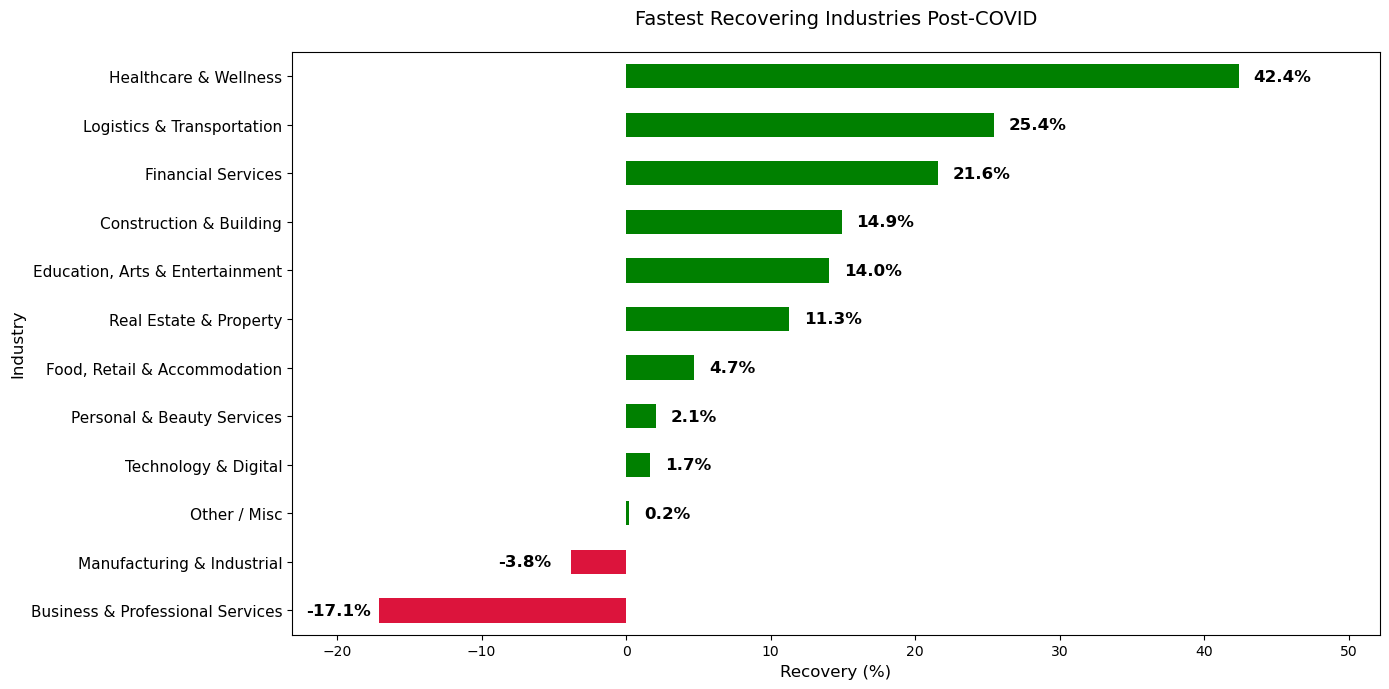

In [35]:
# --- FASTEST RECOVERY ---
fig, ax = plt.subplots(figsize=(14, 7))

colors_recovery = ['green' if v > 0 else 'crimson' for v in fastest_recovery['Recovery (%)']]

fastest_recovery['Recovery (%)'].plot(
    kind='barh',
    color=colors_recovery,
    ax=ax
)

ax.set_title('Fastest Recovering Industries Post-COVID', fontsize=14, pad=20)
ax.set_xlabel('Recovery (%)', fontsize=12)
ax.set_ylabel('Industry', fontsize=12)
ax.invert_yaxis()

ax.set_yticklabels(fastest_recovery.index, fontsize=11)
x_min, x_max = ax.get_xlim()

for i, v in enumerate(fastest_recovery['Recovery (%)']):
    if v < 0:
        ax.text(v - 5,  
                i,
                f"{v:.1f}%",
                va='center',
                ha='left',
                fontsize=12,
                fontweight='bold')
    else:
        ax.text(v + 1,  
                i,
                f"{v:.1f}%",
                va='center',
                ha='left',
                fontsize=12,
                fontweight='bold')

# Extend x-axis to accommodate labels
ax.set_xlim(left=x_min * 1.15, right=x_max * 1.15)

plt.tight_layout()
plt.show()

**HOW HAVE DIFFERENT BUSINESS TYPE CHANGED OVER TIME**

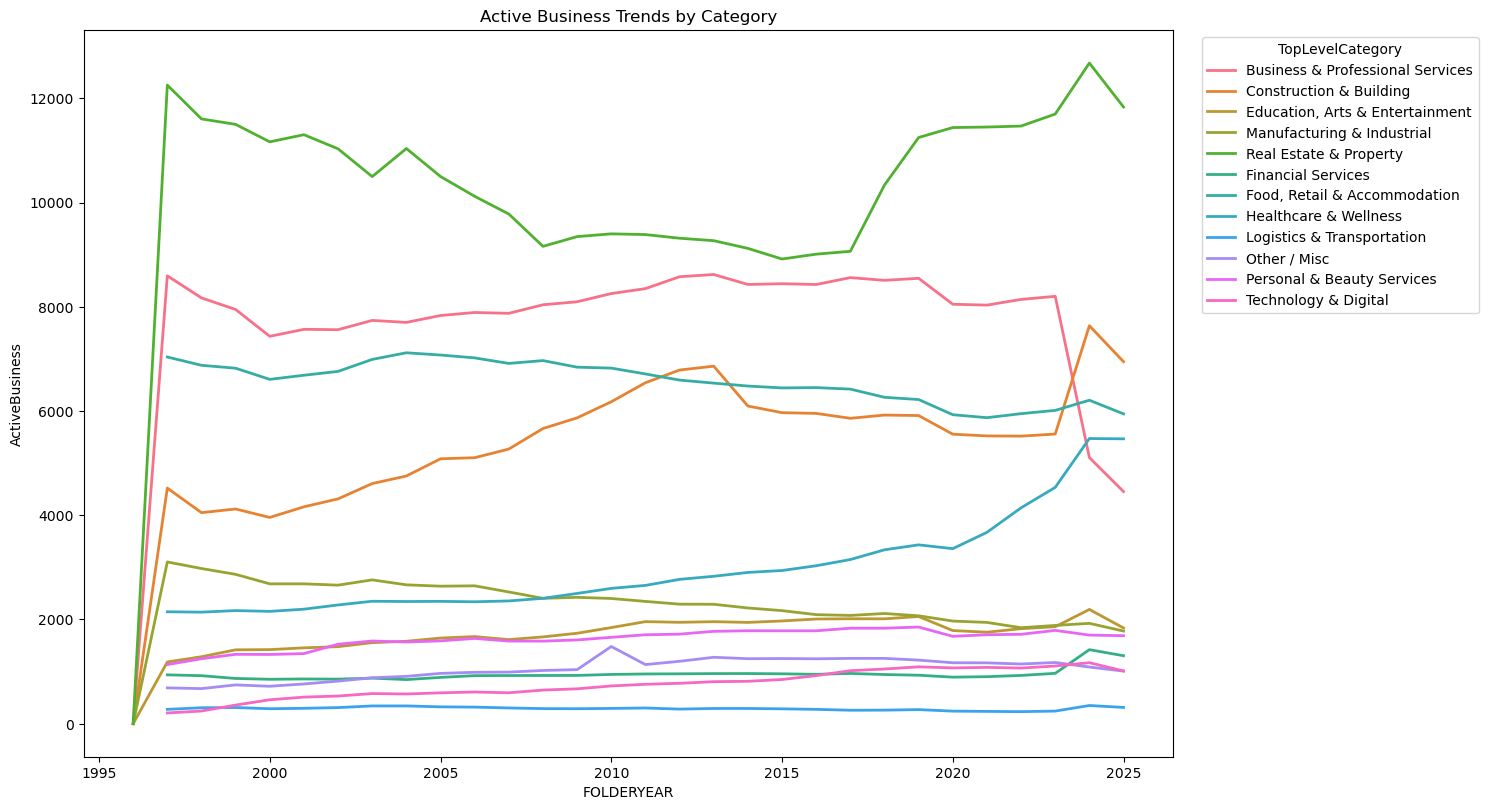

In [36]:
# Metric for active business
active_statuses = ["Issued"]

df['IsActive'] = df['Status'].isin(active_statuses).astype(int)

active_unique = (
    df[df['IsActive'] == 1]
      .drop_duplicates(subset=['BusinessID', 'FOLDERYEAR'])
)

active_business = (
    active_unique
      .groupby(['FOLDERYEAR', 'TopLevelCategory'])
      .size()
      .reset_index(name='ActiveBusiness')
)

# Visualize Active Business Trends by Category over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=active_business, x='FOLDERYEAR', y='ActiveBusiness', 
             hue='TopLevelCategory', linewidth=2)
plt.legend(title='TopLevelCategory', 
          bbox_to_anchor=(1.02, 1), 
          loc='upper left')
plt.tight_layout()
plt.title("Active Business Trends by Category")
plt.show()


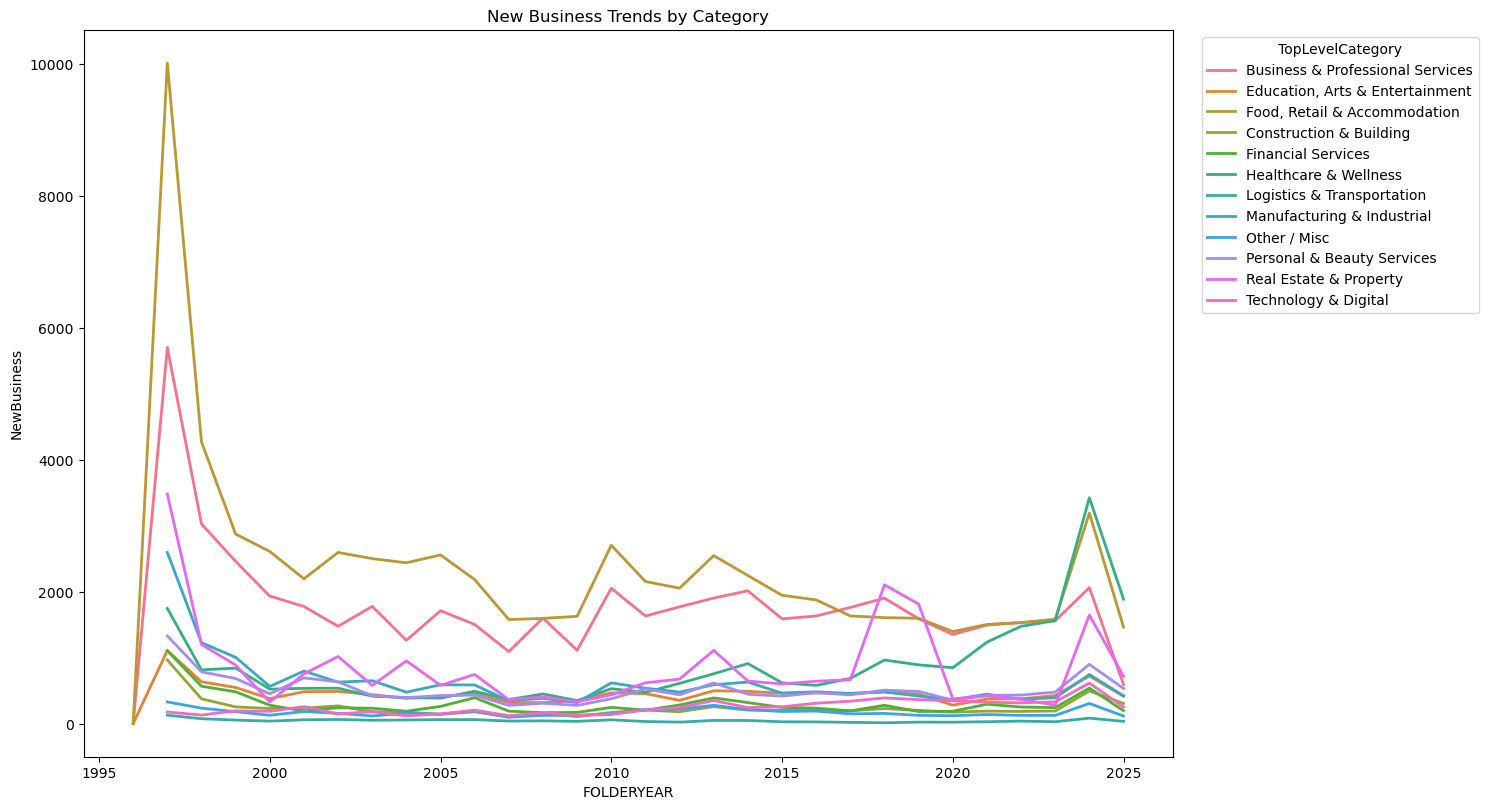

In [37]:
# Metric for new business
df['BusinessID'] += "_" + df['House'].astype(str).str.lower() + "_" + df['Street'].str.lower()

first_year = (
    df.groupby('BusinessID')['FOLDERYEAR']
      .min()
      .reset_index(name='FirstYear')
)
df = df.merge(first_year, on='BusinessID', how='left')

df['IsNewBusiness'] = (df['FOLDERYEAR'] == df['FirstYear']).astype(int)

new_business = (
    df[df['IsNewBusiness'] == 1]
      .groupby(['FOLDERYEAR', 'TopLevelCategory'])
      .size()
      .reset_index(name='NewBusiness')
)

# Visualize New Business Trends by Category over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=new_business, x='FOLDERYEAR', y='NewBusiness', 
             hue='TopLevelCategory', linewidth=2)
plt.legend(title='TopLevelCategory', 
          bbox_to_anchor=(1.02, 1), 
          loc='upper left')
plt.tight_layout()
plt.title("New Business Trends by Category")
plt.show()